In [1]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt


In [2]:
# Load the dataset
df = pd.read_csv("spam.csv", encoding='latin1')

# Keep only necessary columns and rename them
df = df[['v1', 'v2']].rename(columns={'v1': 'label', 'v2': 'message'})


In [3]:
# Initialize the TF-IDF Vectorizer
vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)

# Transform messages into TF-IDF feature vectors
X_tfidf = vectorizer.fit_transform(df['message'])


In [4]:
# Apply PCA to reduce TF-IDF features to 2 dimensions
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_tfidf.toarray())


In [5]:
# Convert string labels to numerical values
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['label'])  # 'ham' -> 0, 'spam' -> 1


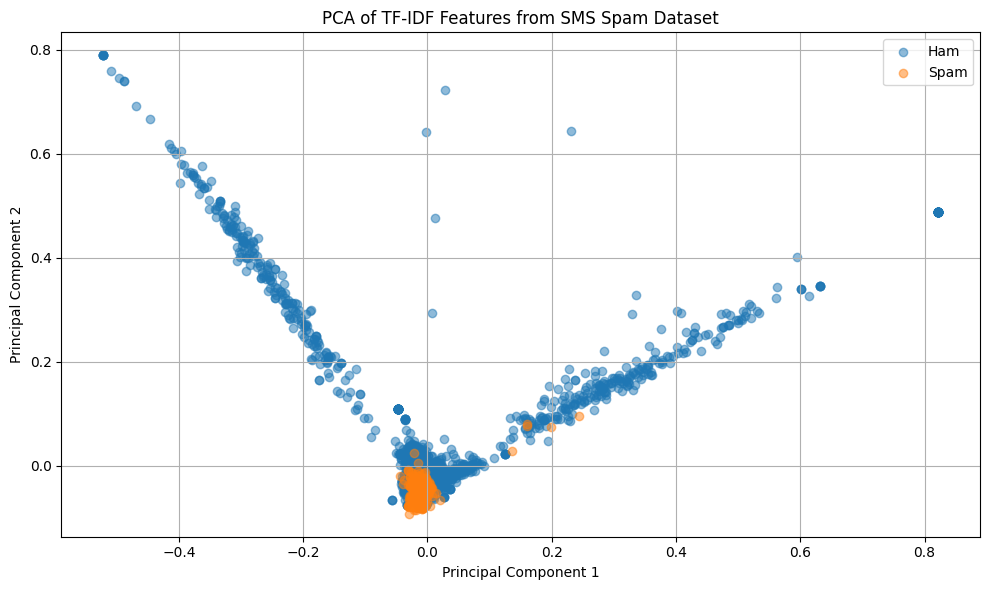

In [6]:
# Plot the 2D PCA-transformed data
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[y == 0, 0], X_pca[y == 0, 1], alpha=0.5, label='Ham')
plt.scatter(X_pca[y == 1, 0], X_pca[y == 1, 1], alpha=0.5, label='Spam')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of TF-IDF Features from SMS Spam Dataset')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


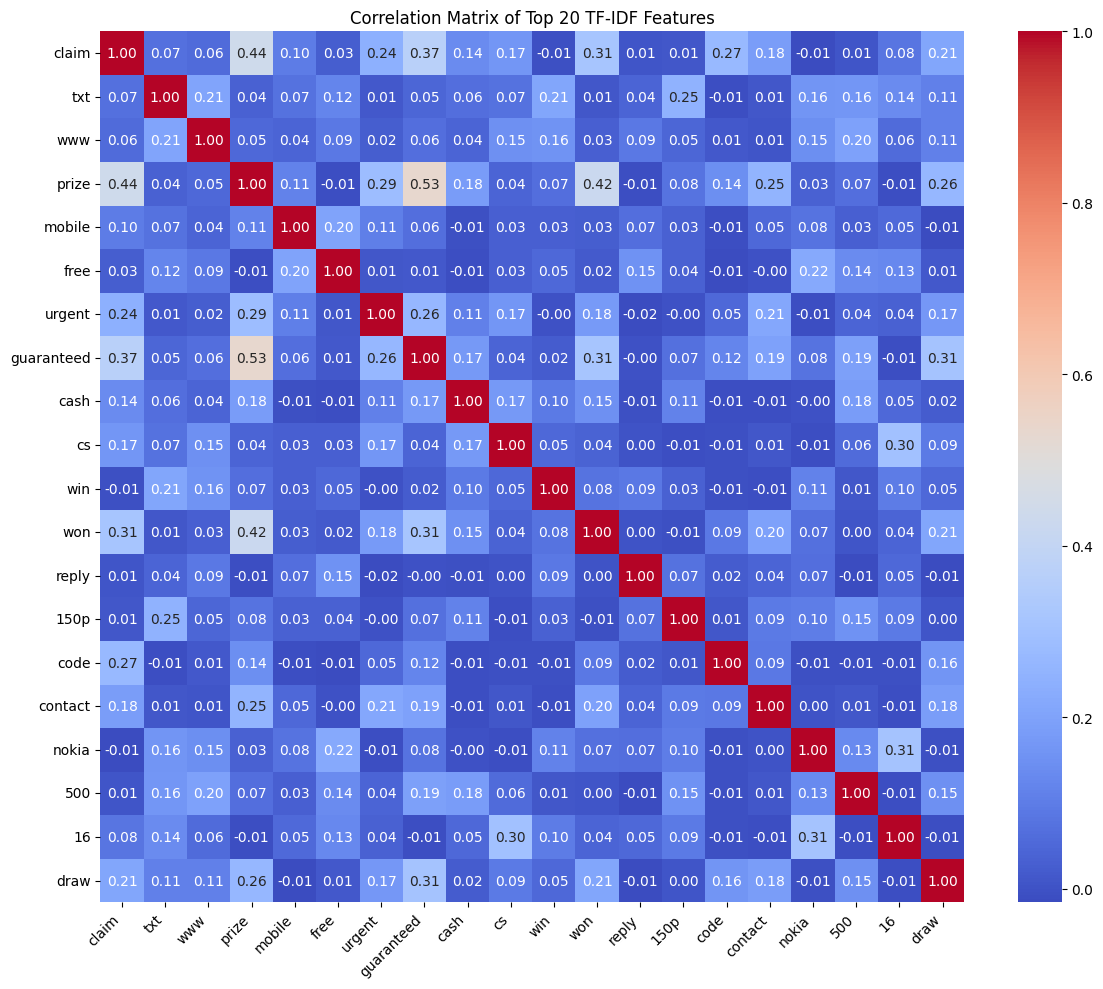

In [7]:
import numpy as np
import seaborn as sns

# Calculate correlation matrix from TF-IDF features
# Convert to DataFrame for labeling
tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns=vectorizer.get_feature_names_out())

# Compute the correlation matrix
correlation_matrix = tfidf_df.corr()

# Plot the heatmap for the most important (top 20) correlated features
top_features = correlation_matrix.abs().sum().sort_values(ascending=False).head(20).index
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix.loc[top_features, top_features], annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Matrix of Top 20 TF-IDF Features")
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()